# Gráfica dispersión: Edad y Colesterol

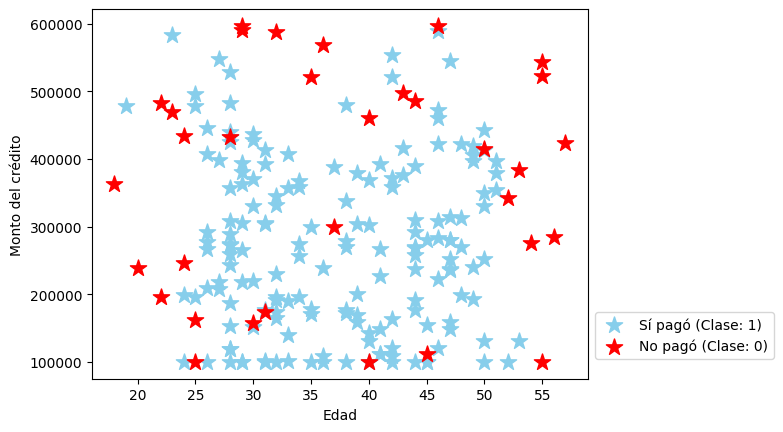

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

clientes = pd.read_csv("creditos.csv")

buenos = clientes[clientes["cumplio"]==1]
malos = clientes[clientes["cumplio"]==0]

plt.scatter(buenos["edad"], buenos["credito"],
            marker="*", s=150, color="skyblue",
            label="Sí pagó (Clase: 1)")

plt.scatter(malos["edad"], malos["credito"],
            marker="*", s=150, color="red", 
            label="No pagó (Clase: 0)")

plt.ylabel("Monto del crédito")
plt.xlabel("Edad")
plt.legend(bbox_to_anchor=(1, 0.2)) 
plt.show()


# Entropía:
#### Promedio de información almacenada en una variable aleatoria

In [4]:
from scipy.stats import entropy
from math import log

edades = pd.Series([40, 30, 20, 50])
monto = pd.Series([100, 110, 100, 110])

print(edades.value_counts()/edades.size)
print(monto.value_counts()/monto.size)
print(entropy(edades.value_counts()/edades.size, base=2))
print(entropy(monto.value_counts()/monto.size, base=2))


40    0.25
30    0.25
20    0.25
50    0.25
dtype: float64
100    0.5
110    0.5
dtype: float64
2.0
1.0


<BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR>

# Datos de Entrenamiento y Prueba

In [5]:
from sklearn.model_selection import train_test_split

datos_entrena, datos_prueba, clase_entrena, clase_prueba = train_test_split(
    pacientes[["edad", "colesterol"]],
    pacientes["problema_cardiaco"], 
    test_size=0.30)


KeyError: "['colesterol'] not in index"

<BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR>

# Creación del Árbol de Decisión

0.4111111111111111
|--- Edad <= 54.50
|   |--- Colesterol <= 173.50
|   |   |--- class: 0
|   |--- Colesterol >  173.50
|   |   |--- Colesterol <= 271.50
|   |   |   |--- Edad <= 52.50
|   |   |   |   |--- Edad <= 51.50
|   |   |   |   |   |--- Colesterol <= 198.50
|   |   |   |   |   |   |--- Colesterol <= 194.50
|   |   |   |   |   |   |   |--- Edad <= 42.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- Edad >  42.50
|   |   |   |   |   |   |   |   |--- Edad <= 44.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- Edad >  44.50
|   |   |   |   |   |   |   |   |   |--- Edad <= 47.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- Edad >  47.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Colesterol >  194.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Colesterol >  198.50
|   |   |   |   |   |   |--- Coleste

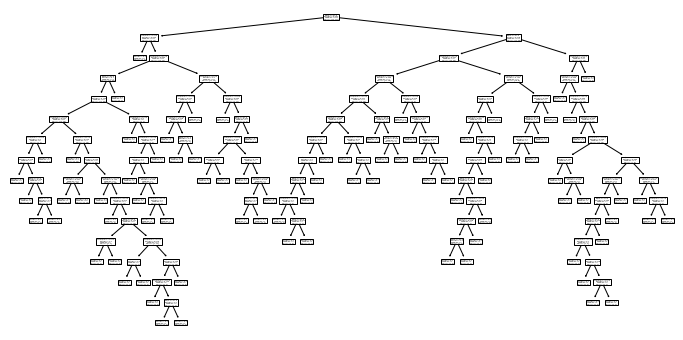

In [ ]:
from sklearn import tree

arbol_decision = tree.DecisionTreeClassifier(criterion="entropy")

arbol = arbol_decision.fit(datos_entrena, clase_entrena)

accuracy = arbol_decision.score(datos_prueba, clase_prueba)

print(accuracy)

print(tree.export_text(arbol,
                      feature_names=["Edad", "Colesterol"]))
plt.figure(figsize=(12, 6))
tree.plot_tree(arbol, 
              feature_names=["Edad", "Colesterol"])
plt.show()


<BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR>

# Clasifica a nuevos pacientes

In [ ]:
print("Nuevo paciente", arbol_decision.predict([[70, 150]]))

Nuevo paciente [1]


<BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR>